In [1]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from IPython.display import clear_output

In [2]:
model=tf.keras.models.load_model('mask.h5')

In [3]:
labels=["With Mask","Without Mask"]

In [4]:
def predict(path):
    image=cv2.imread(path)
    image=cv2.resize(image,(224,224))
    plt.imshow(image)
    image=preprocess_input(image)
    image=image.reshape(1,224,224,3)
    p=model.predict(image)
    index=np.argmax(p)
    print(labels[index]," -- ",p[0][index])
    
    

With Mask  --  0.95778364


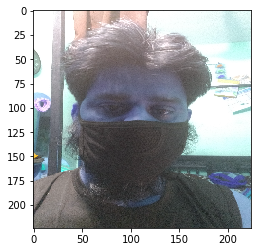

In [5]:
predict("test/1.jpg")

In [7]:
video=cv2.VideoCapture(0)
video.set(3,640)  #width
video.set(4,480)  #height

while True:
    rect,frame=video.read()
    img=cv2.resize(frame,(224,224))
    img=img.reshape(1,224,224,3)
    img=preprocess_input(img)
    p=model.predict(img)
    index=np.argmax(p)    
    clear_output(wait=True)
    label=labels[index]
    prob=p[0][index]
    if prob>0.50:
        print(label," Probaility ",prob)
    
    cv2.imshow("video",frame)
    
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
video.release()
cv2.destroyAllWindows()

    

Without Mask  Probaility  0.97209656
